In [2]:
%load_ext autoreload
%autoreload 2
from markov import *
import matplotlib.pyplot as plt

# Making of the add_string() method

In [41]:
model = MarkovModel(5)
model.add_string("CS 477 rocks")
#model.get_prefixs()
#model.get_prefix_count()
print(model)

CS 47 {'7': 1}
S 477 {' ': 1}
 477  {'r': 1}
477 r {'o': 1}
77 ro {'c': 1}
7 roc {'k': 1}
 rock {'s': 1}
rocks {'C': 1}
ocksC {'S': 1}
cksCS {' ': 1}
ksCS  {'4': 1}
sCS 4 {'7': 1}
This is a Markov model with prefix length 5.


### Checking actual data

In [34]:
model = MarkovModel(5)
model.load_file_lines("text/spongebobquotes.txt")
print(model.get_prefix_count())
print(model.get_prefix(' you '))
#print(model)

4032
{'s': 4, 'm': 1, 't': 4, 'l': 1, 'j': 1, 'w': 1, 'a': 4, 'b': 1, 'h': 1, 'c': 4, 'k': 1, 'e': 1, 'g': 1}


In [14]:
len(model.markov_dict[' you '])

13

`{'s': 4, 'm': 1, 't': 4, 'l': 1, 'j': 1, 'w': 1, 'a': 4, 'b': 1, 'h': 1, 'c': 4, 'k': 1, 'e': 1, 'g': 1}`

Should have 4032 unique prefixs;

`' you '` will have all the characters above in the dict

# Computing Probabilities (10 Pts)

"aaacbaaaacabacbbcabcccbccaaac" <br>
probablity of "aacabaa" = -3.91

In [9]:
m = MarkovModel(3)
m.add_string("aaacbaaaacabacbbcabcccbccaaac")
#print(m)
print("probablity: {:.2f}".format(m.get_log_probability("aacabaa", debug=True)))

prefix: aac. character a. np: 3. npc: 2. curr prob: 0.5.
prefix: aca. character b. np: 2. npc: 1. curr prob: 0.4.
prefix: cab. character a. np: 2. npc: 1. curr prob: 0.4.
prefix: aba. character a. np: 1. npc: 0. curr prob: 0.25.
probablity: -3.91


In [10]:
model = MarkovModel(6)
model.load_file_lines("text/spongebobquotes.txt")
#print(model.get_unique_chars())
print("probablity: {:.1f}".format(model.get_log_probability("I'm ready, I'm ready")))

probablity: -40.5


probablity should be "-40.5"

In [11]:
print("probablity: {:.1f}".format(model.get_log_probability("Artificial intelligence")))

probablity: -69.6


probablity should be "-69.6"

# 2016 US Presidental Debate (10 Pts)

### Training Models

In [3]:
def create_models(K=5):
    trump = MarkovModel(K)
    trump.load_file("text/2016Debates/trump1.txt")
    trump.load_file("text/2016Debates/trump2.txt")
    clinton = MarkovModel(K)
    clinton.load_file("text/2016Debates/clinton1.txt")
    clinton.load_file("text/2016Debates/clinton2.txt")
    return trump, clinton

## Task 1: Classification for a fixed K (5 Points)


In [22]:
def classification(trump, clinton, N=40, debug=False):
    matrix = dict()
    incorrect_classification = {"trump": [], "clinton": []}
    like_trump = 0
    like_clinton = 0
    if debug:
        print("#Guessed that trump said it. #Guessed that Clinton said it")
    for speaker in ["trump", "clinton"]:
        for i in range(N):
            fin = open("text/2016Debates/{}3-{:02d}.txt".format(speaker, i), encoding="utf8")
            s = fin.read() # This holds the text as a string
            fin.close()
            for quote in s.split('\n\n'):
                trump_prob = trump.get_log_probability(s)
                clinton_prob = clinton.get_log_probability(s)
                if trump_prob > clinton_prob:
                    like_trump += 1
                    if speaker == "clinton":
                        incorrect_classification[speaker].append([i, s])
                else:
                    like_clinton += 1
                    if speaker == "trump":
                        incorrect_classification[speaker].append([i, s])
        matrix[speaker] = [like_trump, like_clinton]
        if debug:
            print("Quote from {}: {}. {}".format(speaker, like_trump, like_clinton))
        like_trump = 0
        like_clinton = 0
    return matrix, incorrect_classification
        
trump, clinton = create_models(5)
classification(trump,clinton,debug=True)

#Guessed that trump said it. #Guessed that Clinton said it
Quote from trump: 126. 4
Quote from clinton: 4. 99


({'trump': [126, 4], 'clinton': [4, 99]},
 {'trump': [[3,
    'Well, if that would happen, because I am pro-life and I will be appointing pro-life judges, I would think that would go back to the individual states.\n\nIf they overturned it, it would go back to the states.\n\nIf we put another two or perhaps three justices on, that is really what will happen. That will happen automatically in my opinion. Because I am putting pro-life justices on the court. I will say this. It will go back to the states and the states will then make a determination.\n\n'],
   [3,
    'Well, if that would happen, because I am pro-life and I will be appointing pro-life judges, I would think that would go back to the individual states.\n\nIf they overturned it, it would go back to the states.\n\nIf we put another two or perhaps three justices on, that is really what will happen. That will happen automatically in my opinion. Because I am putting pro-life justices on the court. I will say this. It will go back

## Task 2: Hyperparameter Optimization (3 Points)

In [23]:
result = dict()
incorrect_classification = dict()
for k in range(1,21):
    trump, clinton = create_models(k)
    result[k], incorrect_classification[k] = classification(trump, clinton)
    #print(result[k])

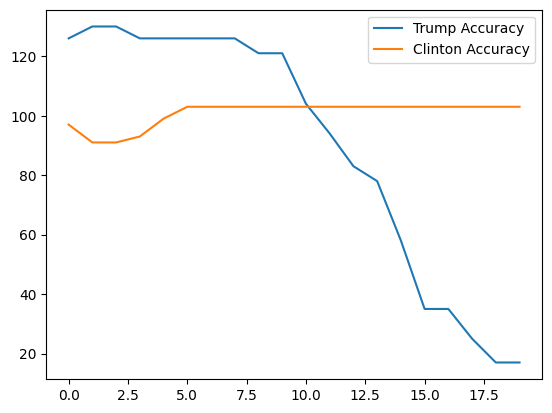

In [24]:
#print(np.zeros(20))    
    
x_trump = []
y_clinton = []
for result in result.values():
    #print(result["trump"][0])
    x_trump.append(result["trump"][0])
    y_clinton.append(result["clinton"][1])
    
#print(x_trump)
#print(y_clinton)
plt.plot(x_trump)
plt.plot(y_clinton)
plt.legend(["Trump Accuracy", "Clinton Accuracy"])
plt.show()

**What trends do you notice in the plot?**<br>
After $K=7$, trump's accuracy drops from high 30s and linearally goes down until $K=20$
After $K=5$, clinton's accuracy goes to $100$% where the model gets it right all the time

**Given what you know about these models, can you explain these trends?**<br>


## Task 3: Explainability (3 Points)

In [19]:
print(result[7])
print(incorrect_classification[7])

{'trump': [39, 1], 'clinton': [0, 40]}
{'trump': [[3, 'Well, if that would happen, because I am pro-life and I will be appointing pro-life judges, I would think that would go back to the individual states.\n\nIf they overturned it, it would go back to the states.\n\nIf we put another two or perhaps three justices on, that is really what will happen. That will happen automatically in my opinion. Because I am putting pro-life justices on the court. I will say this. It will go back to the states and the states will then make a determination.\n\n']], 'clinton': []}


$K=7$ I found is the best value for K as it only gets one incorrect classification with classifying trump's quote as coming from clinton. Which is pretty good. I don't really understand why this quote is classified wrong as we know that clinton would 

## Task 4: Most Prominent Differences (5 Points)